In [2]:
import os
from tqdm import tqdm
import pickle
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from metaspace import SMInstance

# Load datasets

In [3]:
sm = SMInstance()

In [4]:
# Get all datasets
dss = sm.datasets()

In [6]:
len(dss)

8283

In [10]:
metadata = sm.get_metadata()

In [66]:
metadata

,Data_Type,Sample_Information.Organism,Sample_Information.Organism_Part,Sample_Information.Condition,Sample_Information.Sample_Growth_Conditions,Sample_Preparation.Sample_Stabilisation,Sample_Preparation.Tissue_Modification,Sample_Preparation.MALDI_Matrix,Sample_Preparation.MALDI_Matrix_Application,Sample_Preparation.Solvent,MS_Analysis.Polarity,MS_Analysis.Ionisation_Source,MS_Analysis.Analyzer,MS_Analysis.Detector_Resolving_Power.Resolving_Power,MS_Analysis.Detector_Resolving_Power.mz,MS_Analysis.Pixel_Size.Xaxis,MS_Analysis.Pixel_Size.Yaxis,Additional_Information.Supplementary
2023-05-31_10h36m41s,Imaging MS,Homo sapiens (human),Breast tumor,cancer,,Fresh frozen,Frozen,DAN,sprayer,70/30 acetone/water,Negative,AP-SMALDI 5,Orbitrap,70000,200.0,30.0,30.0,
2023-05-31_10h34m50s,Imaging MS,Homo sapiens (human),Breast tumor,cancer,,Fresh frozen,Frozen,DAN,sprayer,30/70 acetone/water,Negative,AP-SMALDI 5,Orbitrap,70000,200.0,25.0,25.0,
2023-05-30_13h52m55s,Imaging MS,Homo sapiens (human),Breast tumor,cancer,,Fresh frozen,Frozen,9-aminoacridine (9AA),sprayer,70/30 acetone/water,Negative,AP-SMALDI 5,Orbitrap,70000,200.0,25.0,25.0,
2021-07-08_15h03m30s,Imaging MS,Bathymodiolus childressi,Gill,N/A,N/A,Fresh frozen,None,"2,5-dihydroxyacetophenone (DHAP)",Sublimation,none,Positive,MALDI-2,Orbitrap,70000,200.0,2.0,2.0,
2023-05-26_22h03m03s,Imaging MS,Homo sapiens (human),Kidney,"s-2203-016117, 50um",,FFPE,None,CHCA,HTX,"50% ACN, 50% H2O with 0.1% TFA",Positive,MALDI,FTICR,100000,400.0,50.0,50.0,biopsy_18-162-2\n\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-25_09h27m43s,Imaging MS,Homo sapiens (human),Uterus,N/A,N/A,None,None,n-(1-naphthyl)ethylenediamine dihydrochloride ...,TM Sprayer,none,Negative,MALDI,FTICR,130000,400.0,NaN,NaN,
2018-05-02_17h39m57s,Imaging MS,Hordeum vulgare,Plantlet,Wild type VS mutant,Soil,None,None,alpha-cyano-4-hydroxycinnamic acid (CHCA),ImagePrep,MeOH,Positive,MALDI,FTICR,295000,400.0,NaN,NaN,
2018-04-27_16h56m19s,Imaging MS,Homo sapiens (human),Kidney,Wildtype,N/A,Fresh frozen,None,"2,5-dihydroxybenzoic acid (DHB)",TM sprayer,50% MeOH,Positive,MALDI,Orbitrap,120000,200.0,NaN,NaN,"\n Auto recal {'polarity': 'Positive', 'organ'..."
2018-04-27_17h39m20s,Imaging MS,Homo sapiens (human),Kidney,Wildtype,N/A,Fresh frozen,None,"2,5-dihydroxybenzoic acid (DHB)",TM sprayer,50% MeOH,Positive,MALDI,Orbitrap,120000,200.0,NaN,NaN,"\n Auto recal {'polarity': 'Positive', 'organ'..."


In [11]:
metadata.columns

Index(['Data_Type', 'Sample_Information.Organism',
       'Sample_Information.Organism_Part', 'Sample_Information.Condition',
       'Sample_Information.Sample_Growth_Conditions',
       'Sample_Preparation.Sample_Stabilisation',
       'Sample_Preparation.Tissue_Modification',
       'Sample_Preparation.MALDI_Matrix',
       'Sample_Preparation.MALDI_Matrix_Application',
       'Sample_Preparation.Solvent', 'MS_Analysis.Polarity',
       'MS_Analysis.Ionisation_Source', 'MS_Analysis.Analyzer',
       'MS_Analysis.Detector_Resolving_Power.Resolving_Power',
       'MS_Analysis.Detector_Resolving_Power.mz',
       'MS_Analysis.Pixel_Size.Xaxis', 'MS_Analysis.Pixel_Size.Yaxis',
       'Additional_Information.Supplementary'],
      dtype='object')

In [141]:
missing_data_fields = ['N/A', 'None', 'mixed', 'none', 'unknown', 'n/a', 'NA', '', 'See study plan', 'Other', 'Nonea', '-', '\n', '\n\n']

In [142]:
val = 30
col = 'Additional_Information.Supplementary'
metadata[col].value_counts()[val:(val+10)]

Spatial Resolution 50 um\nSample Description: KPMP Kidney Pilot Study                                                                                                                                                    16
Sample Description: 18-139-2                                                                                                                                                                                             16
Slice thickness is 30µm. Section of visual cortex.                                                                                                                                                                       14
17-635-001                                                                                                                                                                                                               14
Sample Description: Jejunum\nSample Preparation: Jejunum opened and rolled to increase analysis length, embedded in CMC 

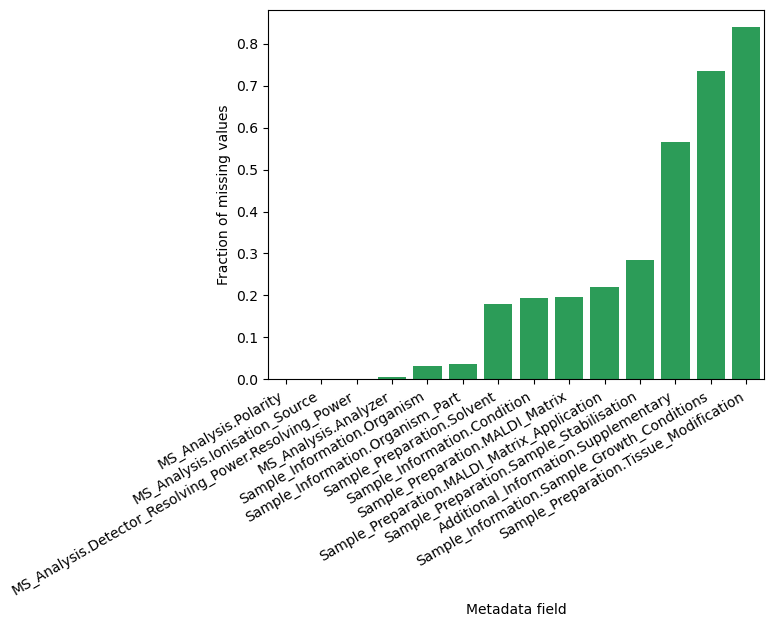

In [192]:
missing_data_dict = {}
for col in metadata.columns:
    if col not in ['MS_Analysis.Detector_Resolving_Power.mz', 'MS_Analysis.Pixel_Size.Xaxis', 'MS_Analysis.Pixel_Size.Yaxis', 'Data_Type']:
        missing_data_dict[col] = sum(metadata[col].isin(missing_data_fields)) / metadata.shape[0]
        
df = pd.DataFrame({'fraction': pd.Series(missing_data_dict)}).reset_index().rename(columns={'index': 'metadata_field'}).sort_values('fraction')

ax = sns.barplot(data=df, x='metadata_field', y='fraction', color='#1aae54')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Fraction of missing values')
plt.xlabel('Metadata field')
plt.show()

In [175]:
complete_metadata_dict = {}
for col in metadata.columns:
    if col not in ['MS_Analysis.Detector_Resolving_Power.mz', 'MS_Analysis.Pixel_Size.Xaxis', 'MS_Analysis.Pixel_Size.Yaxis', 'Data_Type']:
        complete_metadata_dict[col] = metadata[col].isin(missing_data_fields)
        
df = pd.DataFrame(complete_metadata_dict)

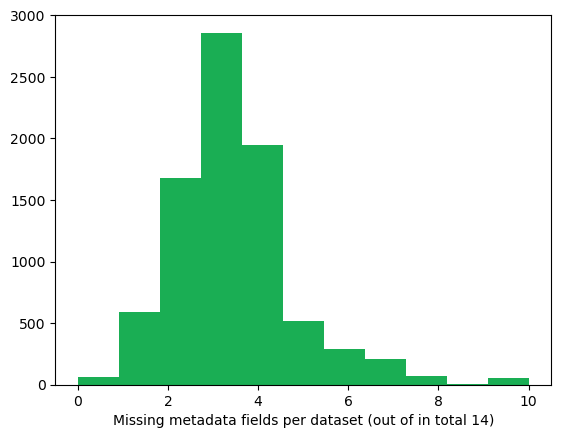

In [190]:
plt.hist(df.sum(axis=1), color='#1aae54', bins=11)
plt.xlabel('Missing metadata fields per dataset (out of in total 14)')
plt.show()